# Backtesting Investment Strategies

## Table of Contents

[Required Libraries](#Required-Libraries)
- [SSL Error](#SSL-Error)


[Companies that Make up the Dow (Scraping table data from Wikipedia)](#Companies-that-Make-up-the-Dow)
- [Unicode Normalization](#Unicode-Normalization)
    
    
[yfinance Library](#yfinance-Library)


[Simple Data Visualization & Returns of DIA](#Simple-Data-Visualization-and-Returns-of-DIA)


[Backtesting a Simple Momentum Strategy](#Backtesting-a-Simple-Momentum-Strategy)

[Backtesting a Simple Moving Averages Crossover Strategy](#Backtesting-a-Simple-Moving-Averages-Crossover-Strategy)
- [What Simple Moving Averages Are](#What-Simple-Moving-Averages-Are)
- [Our Strategy](#Our-Strategy)

[Conclusion](#Conclusion)

<br></br>

<center>Press the button to see the code behind everything or just view the notebook with code hidden: </center>
<form action="javascript:code_toggle()" class="toggle_button_for_code"><input type="submit" id="toggleButton" value="Show Code"></form>

<br></br>

## Required Libraries

<u>Libraries used in this project include:</u>

1. Python: pandas, numpy, matplotlib

2. <a href="https://pypi.org/project/yfinance/" target="_blank">yfinance Library</a>

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

### SSL Error

Depending on the version of jupyter/ pandas you have, you may run into a SSL error if you use: 
```python
pd.read_html()
```
to fetch table data. To fix this, please refer to the <a href="https://moreless.medium.com/how-to-fix-python-ssl-certificate-verify-failed-97772d9dd14c" target="_blank">link here</a>

In [2]:
# Fixing Python SSL Certificate Failed Error

import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

--------------------------------------------------------

## Companies that Make up the Dow

"DIA is the <a href="https://www.investopedia.com/terms/e/etf.asp" target="_blank">exchange traded fund (ETF)</a> for investors seeking to replicate the performance of the Dow, which tracks the stocks of some of the largest companies in the U.S. economy." -<a href="https://www.investopedia.com/etfs/etfs-track-dow/" target="_blank">Investopedia</a>


In this section we're going to grab all 30 companies and append it to a list in order to grab historical data using yfinance later on.

In [3]:
temp = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")
# temp should be of type <class 'list'>

Here are all 30 companies returned when after we fetched the table. 

<u>Note</u>: <i>pd.read_html( ) returns a list of tables from the webpage - accessing a table by index will automatically organize column and row attributes for us!.</i> 

Additionally, let's take a look at at the data types of each column in our data frame. The .info( ) method returns a concise summary of the dataframe.

In [4]:
# The table we want to grab containing the stock data is in index position 1
# in pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")

stocks = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
display(stocks)
print("\n")
stocks.info()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.38%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.29%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,3.84%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.76%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,4.01%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,3.73%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,2.07%
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,1.03%
8,Coca-Cola,NYSE,KO,Soft Drink,1987-03-12,Also 1932-05-26 to 1935-11-20,1.01%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,3.18%




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          30 non-null     object
 1   Exchange         30 non-null     object
 2   Symbol           30 non-null     object
 3   Industry         30 non-null     object
 4   Date added       30 non-null     object
 5   Notes            4 non-null      object
 6   Index weighting  30 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


We're only going to be using the first 5 columns here (Company -> Date added). From our data frame summary, we also see that the dates in "Date added" column are of data type "object" (just text). For our analysis it would be better if the data types in this column are converted to datetime (<a href="https://docs.python.org/3/library/datetime.html" target="_blank">more on datetime here</a>).

<br></br>

Our newly edited data frame and summary:

In [5]:
# Only selecting columns we need
# We need all rows, but just the first 5 columns
stocks = stocks.iloc[:,:5].copy()

# Do not want whitespace in column name
stocks.rename(columns = {"Date added":"Date_Added"}, inplace = True)

# We can also change the datatype in date added specifically to datetime object
stocks.Date_Added = pd.to_datetime(stocks.Date_Added)

display(stocks)
print("\n")
stocks.info()

,Company,Exchange,Symbol,Industry,Date_Added
0,3M,NYSE,MMM,Conglomerate,1976-08-09
1,American Express,NYSE,AXP,Financial services,1982-08-30
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08
8,Coca-Cola,NYSE,KO,Soft Drink,1987-03-12
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     30 non-null     object        
 1   Exchange    30 non-null     object        
 2   Symbol      30 non-null     object        
 3   Industry    30 non-null     object        
 4   Date_Added  30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 1.3+ KB


<br></br>

### Unicode Normalization

Sometimes when using "pd.read_html( )" the scraped info. from tables contains <b>unicode</b> strings that cannot be seen when using the .info() method (it will just say the data types within the column are "objects"). We have to manually check ourselves by looking at the data - so in the example above we manually check the columns for unicode which would look something like (if looking at unicode data in the "Symbols" column):

```python
"NYSE:\xa0MMM"
"NYSE:\xa0AXP"
```

<u>Note</u>: We see that we do not have any unicode strings in our scraped table from wikipedia, but this could be due to the recent jupyter notebooks & tools version I have when doing this project. Below is an image of all the current versions I'm using. 

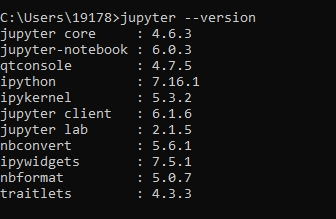

In [6]:
# If you're following along this project and do happen to come across unicode strings, 
# you can normalize these strings into normal form using the 
# python unicode library and doing doing:


# import unicodedata


# ####### Normalizing ########
# stocks.Symbol = stocks.Symbol.apply(lambda x: unicodedata.normalize("NFKD", x))


# ###### Extracting just the ticker Symbol ########
# # Example: instead of NYSE:\xa0MMM we just need MMM

# stocks.Symbol = stocks.Symbol.str.split(": ").apply(lambda x: x[-1])

More information regarding the <a href="https://en.wikipedia.org/wiki/Unicode_equivalence" target="_blank">different normalization forms</a>.

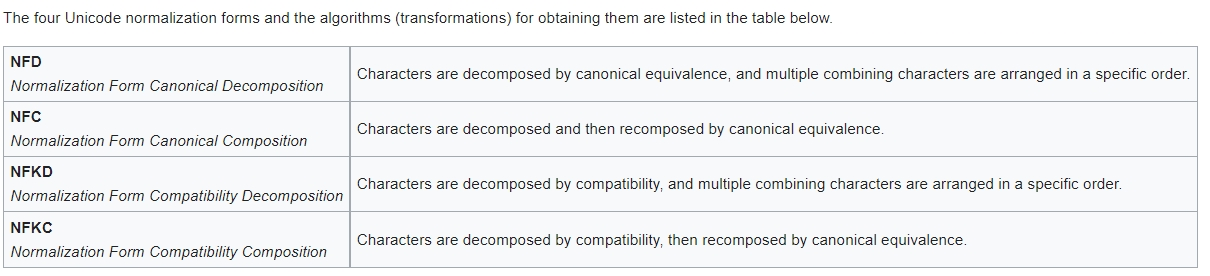

Our list of the 30 tickers that make up the DIA:

In [7]:
# List of tickers for later use

ticker_list = stocks.Symbol.to_list()

for ticker in ticker_list:
    print(ticker, end='\xa0')

MMM AXP AMGN AAPL BA CAT CVX CSCO KO DIS DOW GS HD HON IBM INTC JNJ JPM MCD MRK MSFT NKE PG CRM TRV UNH VZ V WBA WMT 

In [8]:
# Exporting holdings data frame to local machine as csv file

stocks.to_csv("dia_companies.csv", index = False)

--------------------------------------------------------

## yfinance Library

Now that we have the ticker symbols, the next step is to get historical price data for our top 30 companies in the DIA. We can grab this data from Yahoo Finance; however, because Yahoo has decomissioned their historical data API we will use yfinance. 

You can download the files from the link on the left on the website, alternatively - you can also do this using the terminal by doing:

```
pip install yfinance
```

To import the library, see the [required libraries section up top](#Required-Libraries).

Testing out the yfinance library library by downloading historical data of the <a href="https://finance.yahoo.com/quote/DIA/" target="_blank">DIA</a>. For the purposes of this project the past ~15 years of data should be sufficient. 

In [9]:
# Testing out yfinance by grabbing historical data of one company
# in this case we'll look at Microsoft

dia = yf.download("DIA", start = "2007-01-01", end = "2021-10-01") # Entire history

dia

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,125.160004,125.680000,123.879997,124.470001,87.568771,11525000
2007-01-04,124.480003,124.949997,123.889999,124.680000,87.716553,10318700
2007-01-05,124.470001,124.500000,123.519997,123.739998,87.055206,9389000
2007-01-08,123.870003,124.389999,123.250000,124.139999,87.336700,8092400
2007-01-09,124.339996,124.570000,123.419998,124.070000,87.287399,7438700
...,...,...,...,...,...,...
2021-09-24,346.500000,348.429993,346.309998,347.869995,346.433868,3121600
2021-09-27,348.290009,350.500000,348.170013,348.609985,347.170837,3426000
2021-09-28,347.309998,347.820007,342.410004,342.920013,341.504333,7493800


In [10]:
# Exporting to a csv:

dia.to_csv("dia_15year_prices.csv")

<br></br>

Now let's grab the historical data of <b>each individual company</b> from DIA as well:

In [11]:
# Using the ticker list we created earlier

ticker_prices_all = yf.download(ticker_list, start = "2007-01-01", end = "2021-10-01")
ticker_prices_all

[*********************100%***********************]  30 of 30 completed


Adj Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2007-01-03    2.565971   52.892460   47.595966   64.405701   40.502396   
2007-01-04    2.622926   55.158154   47.249004   64.665741   40.396439   
2007-01-05    2.604247   55.289608   46.626072   64.391281   39.879883   
2007-01-08    2.617108   54.848869   47.067657   64.239609   39.926235   
2007-01-09    2.834510   55.111763   46.768002   63.560642   40.144794   
...                ...         ...         ...         ...         ...   
2021-09-24  146.705887  211.831528  175.284256  221.389999  195.739212   
2021-09-27  145.158142  211.335693  176.331650  224.160004  198.901749   
2021-09-28  141.703186  210.502686  172.710648  218.410004  199.448730   
2021-09-29  142.621857  213.110779  171.114609  225.360001  196.783447   
2021-09-30  141.293793  210.879517  167.114563  219.940002  190.915848   

                                                                      ...  \
                   CRM       CSCO         CVX         DIS        DOW  ...   
Date                                                                  ...   
2007-01-03    9.017500  20.310007   39.947884   28.317097        NaN  ...   
2007-01-04    9.470000  20.844673   39.559486   28.540648        NaN  ...   
2007-01-05    9.880000  20.851999   39.711468   28.308817        NaN  ...   
2007-01-08    9.982500  20.969173   40.218052   28.565493        NaN  ...   
2007-01-09    9.990000  20.851999   39.756493   28.524088        NaN  ...   
...                ...        ...         ...         ...        ...  ...   
2021-09-24  285.630005  56.349331   99.450577  176.000000  56.119602  ...   
2021-09-27  279.679993  55.842754  101.793503  178.259995  58.964600  ...   
2021-09-28  272.279999  55.147453  102.179047  174.520004  58.737392  ...   
2021-09-29  270.500000  55.107719  102.149384  172.679993  58.105171  ...   
2021-09-30  271.220001  54.064766  100.290863  169.169998  56.860485  ...   

              Volume                                                  \
                 MRK      MSFT       NKE        PG      TRV      UNH   
Date                                                                   
2007-01-03  15740226  76935100  17299200   9717900  3432800  8360300   
2007-01-04  13115930  45774500  15085600   8711400  2068200  5152500   
2007-01-05  11168431  44607200  14996800   9907900  2104600  6215700   
2007-01-08   7384522  50220200  10109600  11068200  2440900  4344100   
2007-01-09   9037114  44636600  15167200  10823800  1319500  5483900   
...              ...       ...       ...       ...      ...      ...   
2021-09-24  14714700  14999000  26913300   5009400   833600  1950400   
2021-09-27   8630600  23571700  11479300   5749700  1106300  2608600   
2021-09-28  11836200  43186200  10692300   7015300   951300  3115400   
2021-09-29  16054500  26353700   7794900   5460000   856800  2056300   
2021-09-30  16248600  32325800  10133600   6934900  1095300  3779900   

                                                    
                    V        VZ      WBA       WMT  
Date                                                
2007-01-03        NaN  21445850  6294500  35687300  
2007-01-04        NaN  19215860  3681800  17073000  
2007-01-05        NaN  19047041  3680900  13556900  
2007-01-08        NaN  20370917  4720800  16396400  
2007-01-09        NaN  16281352  3792500  14643200  
...               ...       ...      ...       ...  
2021-09-24  6461200.0  12663900  3457200   4453500  
2021-09-27  6881100.0  13118200  6688800   7083600  
2021-09-28  6951400.0  19528200  6323800   6860300  
2021-09-29  6432700.0  14823000  5568400   7125200  
2021-09-30  7128500.0  18736600  6449400   7485900  

[3713 rows x 180 columns]

<br></br>

We have here a multi index data frame containing pricing information (Open, High, Low, Close, Adjusted Close, and Volume) of all tickers from since 2007. We only need the <b>daily close prices</b> here so we can modify our dataframe here to only contain that. The edited data frame is below:

In [12]:
prices = ticker_prices_all.loc[:, "Close"].copy()

display(prices)
print("\n")
prices.info()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,60.360001,89.169998,61.160000,9.017500,27.730000,70.970001,33.738300,NaN,...,42.003819,29.860001,12.208750,64.540001,53.549999,52.570000,NaN,35.306732,46.070000,47.549999
2007-01-04,3.059286,71.330002,59.919998,89.529999,61.000000,9.470000,28.459999,70.279999,34.004654,NaN,...,43.043892,29.809999,12.333750,64.050003,53.099998,52.910000,NaN,35.502777,46.160000,47.779999
2007-01-05,3.037500,71.500000,59.130001,89.150002,60.220001,9.880000,28.469999,70.550003,33.728436,NaN,...,42.270992,29.639999,12.353750,63.500000,52.410000,52.549999,NaN,34.895969,45.500000,47.389999
2007-01-08,3.052500,70.930000,59.689999,88.940002,60.290001,9.982500,28.629999,71.449997,34.034248,NaN,...,42.261452,29.930000,12.316250,63.639999,52.020000,53.320000,NaN,34.363850,45.689999,47.000000
2007-01-09,3.306071,71.269997,59.310001,88.000000,60.619999,9.990000,28.469999,70.629997,33.984924,NaN,...,41.870228,29.959999,12.470000,63.480000,51.889999,52.680000,NaN,34.503880,45.930000,47.389999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-24,146.919998,213.610001,175.720001,221.389999,196.820007,285.630005,56.730000,100.599998,176.000000,56.810001,...,73.610001,299.350006,149.589996,143.550003,156.460007,407.079987,231.589996,54.369999,48.310001,143.169998
2021-09-27,145.369995,213.110001,176.770004,224.160004,200.000000,279.679993,56.220001,102.970001,178.259995,59.689999,...,73.360001,294.170013,148.039993,141.660004,156.289993,405.269989,229.600006,54.470001,48.799999,142.250000
2021-09-28,141.910004,212.270004,173.139999,218.410004,200.550003,272.279999,55.520000,103.360001,174.520004,59.459999,...,73.320000,283.519989,145.300003,140.589996,153.490005,398.619995,225.559998,54.160000,48.090000,140.500000




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3713 entries, 2007-01-03 to 2021-09-30
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    3713 non-null   float64
 1   AMGN    3713 non-null   float64
 2   AXP     3713 non-null   float64
 3   BA      3713 non-null   float64
 4   CAT     3713 non-null   float64
 5   CRM     3713 non-null   float64
 6   CSCO    3713 non-null   float64
 7   CVX     3713 non-null   float64
 8   DIS     3713 non-null   float64
 9   DOW     640 non-null    float64
 10  GS      3713 non-null   float64
 11  HD      3713 non-null   float64
 12  HON     3713 non-null   float64
 13  IBM     3713 non-null   float64
 14  INTC    3713 non-null   float64
 15  JNJ     3713 non-null   float64
 16  JPM     3713 non-null   float64
 17  KO      3713 non-null   float64
 18  MCD     3713 non-null   float64
 19  MMM     3713 non-null   float64
 20  MRK     3713 non-null   float64
 21  MSFT    3713 non-

In [13]:
# Exporting prices of each individual company to csv (just closing price!)
prices.to_csv("DIA_30_companies_stock_prices.csv")

--------------------------------------------------------

## Simple Data Visualization and Returns of DIA

Before we begin visualizing, when we import our file (see below), we see that the "Date" column information is recognized as an "object" (essentially text). 

By defauly pandas is not able to identify and convert text data that contains datetime information to the correct data type. So, we will have to manually do this ourselves when we read the .csv file containg datetime info. We will use the parse_dates parameter to convert the date type.

In [14]:
display(pd.read_csv("dia_15year_prices.csv"))
print("\n")
pd.read_csv("dia_15year_prices.csv").info()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-01-03,125.160004,125.680000,123.879997,124.470001,87.568771,11525000
1,2007-01-04,124.480003,124.949997,123.889999,124.680000,87.716553,10318700
2,2007-01-05,124.470001,124.500000,123.519997,123.739998,87.055206,9389000
3,2007-01-08,123.870003,124.389999,123.250000,124.139999,87.336700,8092400
4,2007-01-09,124.339996,124.570000,123.419998,124.070000,87.287399,7438700
...,...,...,...,...,...,...,...
3708,2021-09-24,346.500000,348.429993,346.309998,347.869995,346.433868,3121600
3709,2021-09-27,348.290009,350.500000,348.170013,348.609985,347.170837,3426000
3710,2021-09-28,347.309998,347.820007,342.410004,342.920013,341.504333,7493800
3711,2021-09-29,343.869995,345.670013,342.880005,343.769989,342.350800,4116600




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3713 non-null   object 
 1   Open       3713 non-null   float64
 2   High       3713 non-null   float64
 3   Low        3713 non-null   float64
 4   Close      3713 non-null   float64
 5   Adj Close  3713 non-null   float64
 6   Volume     3713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 203.2+ KB


<br></br>

This is how our data frame should look like:

In [15]:
# Parsing and setting Date as index column
data = pd.read_csv("dia_15year_prices.csv", parse_dates = ["Date"], index_col = "Date")

display(data)
print('\n')
data.info()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,125.160004,125.680000,123.879997,124.470001,87.568771,11525000
2007-01-04,124.480003,124.949997,123.889999,124.680000,87.716553,10318700
2007-01-05,124.470001,124.500000,123.519997,123.739998,87.055206,9389000
2007-01-08,123.870003,124.389999,123.250000,124.139999,87.336700,8092400
2007-01-09,124.339996,124.570000,123.419998,124.070000,87.287399,7438700
...,...,...,...,...,...,...
2021-09-24,346.500000,348.429993,346.309998,347.869995,346.433868,3121600
2021-09-27,348.290009,350.500000,348.170013,348.609985,347.170837,3426000
2021-09-28,347.309998,347.820007,342.410004,342.920013,341.504333,7493800




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3713 entries, 2007-01-03 to 2021-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3713 non-null   float64
 1   High       3713 non-null   float64
 2   Low        3713 non-null   float64
 3   Close      3713 non-null   float64
 4   Adj Close  3713 non-null   float64
 5   Volume     3713 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 203.1 KB


<br></br>

We will only be using the closing prices here, so let's adjust the data frame to just include that.

In [16]:
# Only using the closing prices
df = data.loc[: , "Close"].to_frame()

df

,Close
Date,
2007-01-03,124.470001
2007-01-04,124.680000
2007-01-05,123.739998
2007-01-08,124.139999
2007-01-09,124.070000
...,...
2021-09-24,347.869995
2021-09-27,348.609985
2021-09-28,342.920013


<br></br>

Visualizing the closing prices of DIA with a quick graph:

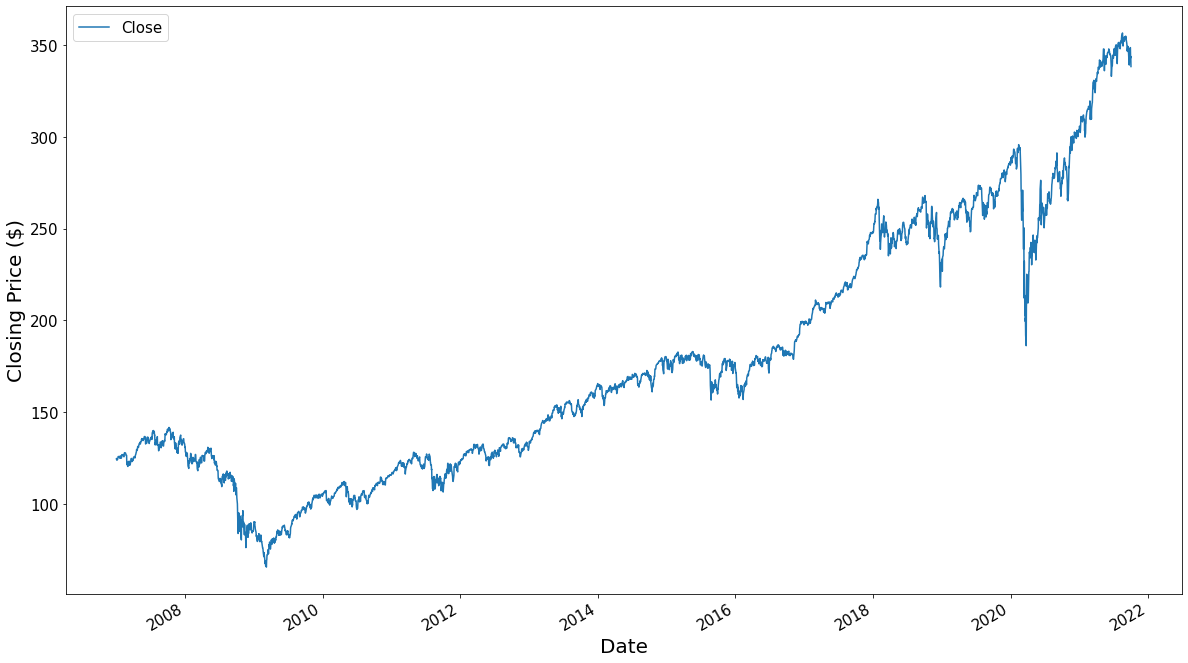

In [17]:
df.plot(figsize = (20,12), fontsize = 15)
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Closing Price ($)", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

<br></br>

Next let's calculate the daily returns (percent change) of DIA and add it as a new column in our data frame using the .pct_change( ) method (<a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html" target="_blank">more info. on that method here</a>)

In [18]:
# Column for Return (relative change)
df['DIA_Return'] = df.Close.pct_change()

# Dropping NaN (missing values), especially for the first Return row
# because we do not have the prices of previous timestamps.
df.dropna(inplace = True)

# Renaming columns to be a bit more descriptive
df.rename(columns = {"Close":"DIA_Close_Price"}, inplace = True)

df

,DIA_Close_Price,DIA_Return
Date,,
2007-01-04,124.680000,0.001687
2007-01-05,123.739998,-0.007539
2007-01-08,124.139999,0.003233
2007-01-09,124.070000,-0.000564
2007-01-10,124.430000,0.002902
...,...,...
2021-09-24,347.869995,0.000892
2021-09-27,348.609985,0.002127
2021-09-28,342.920013,-0.016322


<br></br>

Here is a quick graph of our previous plot now with DIA Returns added in. A secondary axis on the right of the graph measures the DIA Returns which oscillates around zero. You can see the increase in volatility in the past (2007-2009 global financial crisis) and the volatility spikes again recently due to the Covid-19 Pandemic in 2020.

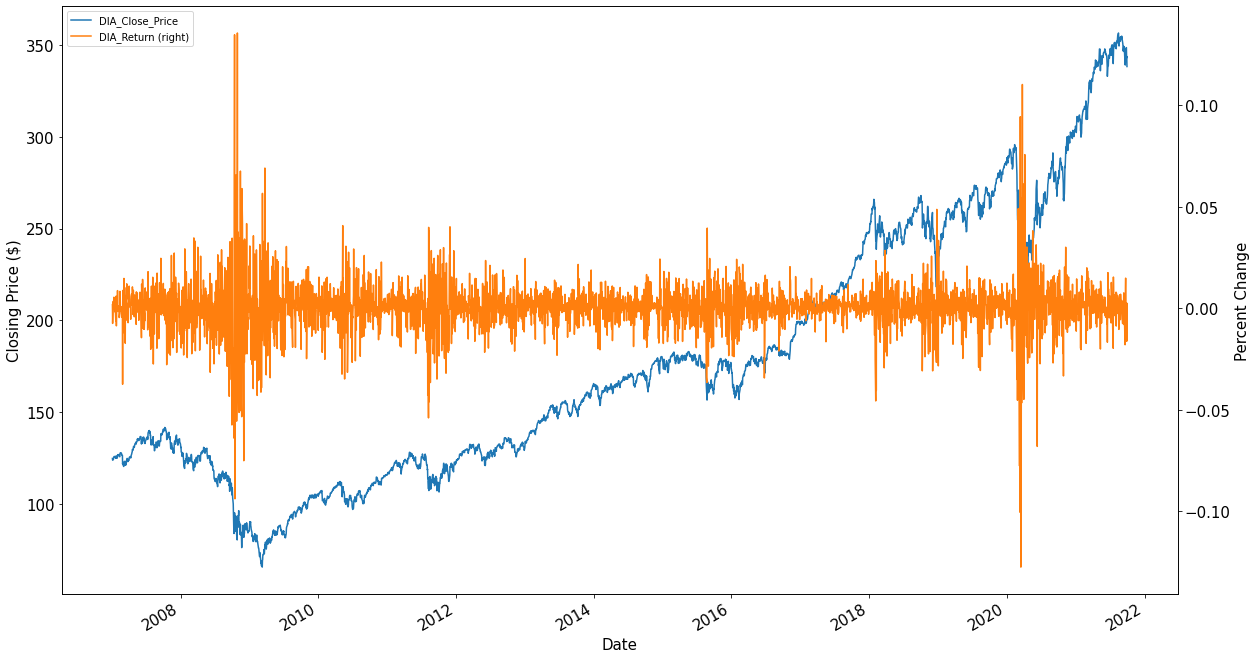

In [19]:
parameters = {'axes.labelsize': 15,'axes.titlesize': 35}
plt.rcParams.update(parameters)

df.plot(figsize = (20, 12), secondary_y = "DIA_Return", 
        mark_right = True, fontsize = 15, 
        ylabel = "Closing Price ($)")

plt.ylabel("Percent Change")

plt.show()

--------------------------------------------------------------------------

## Backtesting a Simple Momentum Strategy

<a href="https://www.investopedia.com/terms/l/long.asp" target="_blank"><u>Long Position</u></a>: Purchase of an asset with the expectation that it will increase in value over time.

<a href="https://www.investopedia.com/terms/s/short.asp" target="_blank"><u>Short Position</u></a>: When an investor anticipates the price of a security will fall in the short term (opposite of a long position).

We will use the following metrics to gauge our positions:

> +1: DIA <b>Long</b> position

> -1: DIA <b>Short</b> position

> 0: DIA <b>No/ Neutral</b> position

Our +1/ -1 indicates that we are just working with <b>one share</b> of DIA.

We're going to backtest our active (simple momentum) strategy against just buying and holding (passive):

1. <b>Buying and Holding</b>: 

    - Initially investing into DIA and do nothing (Position: +1 on any given day)


2. <b>Simple Momentum</b>: 
    - At the end of the day if today's return was positive, then we will invest and take a long position:
        - +1 into DIA if today's return was <i>positive</i>
    
    - At the end of the day if today's return was negative, then we take a short position:
        - -1 into DIA if today's return was <i>negative</i>
        

We are assuming there is momentum in the returns - meaning we expect trends to persist over a longer period (i.e. if today's return is positive then it's likely to have a positive return tomorrow as well, same logic applies if we had negative returns). More info here on <a href="https://www.investopedia.com/terms/m/momentum_investing.asp" target="_blank">What is momentum investing?</a>

<br></br>

Let's create an additional column position that is based on today's returns ("DIA_Return" column) and indicate tomorrow's position. So if today's return is positive, then our position should be +1 and if the return is negative, then our position is -1.

In [20]:
# The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. 
# nan is returned for nan inputs

df["Position"] = np.sign(df["DIA_Return"]) # Using numpy sign method

df

,DIA_Close_Price,DIA_Return,Position
Date,,,
2007-01-04,124.680000,0.001687,1.0
2007-01-05,123.739998,-0.007539,-1.0
2007-01-08,124.139999,0.003233,1.0
2007-01-09,124.070000,-0.000564,-1.0
2007-01-10,124.430000,0.002902,1.0
...,...,...,...
2021-09-24,347.869995,0.000892,1.0
2021-09-27,348.609985,0.002127,1.0
2021-09-28,342.920013,-0.016322,-1.0


<br></br>

Next, we'll create another column and call it "Momentum Return" where we get a percent change value that's either positive or negative depending on if we made a profit/ loss that day (should reflect the <b>changes</b> in DIA closing prices - so the "DIA Return" column): 

( positive = profit | negative = loss )

For example in the date frame below, on Jan. 5th, 2007 the return on our momentum strategy is a <b>negative value</b> - meaning we lost money (that day only). This is because we <b>longed</b> DIA the day before, but the <b>closing price decreased</b>. If we look on the 8th we see that our return is negative again, and this time because we <b>shorted</b> DIA, but the <b>closing price went up</b>! (Note that Jan. 6th and 7th in 2007 are Saturday and Sunday.)

If we take a look on Jan. 11th, 2007, the return on our momentum strategy is a <b>positive value</b> - meaning we made a profit (for the day only). This is because we longed DIA the day before and the closing price went up!

In [21]:
# Shift the position by one timestamp and multiply position 
# with the return of the DIA index to get the true 
# return of our momentum strategy here:
df['Momentum_Return'] = df["Position"].shift() * df["DIA_Return"]

df.head(10) # Show the first 10 rows

,DIA_Close_Price,DIA_Return,Position,Momentum_Return
Date,,,,
2007-01-04,124.680000,0.001687,1.0,NaN
2007-01-05,123.739998,-0.007539,-1.0,-0.007539
2007-01-08,124.139999,0.003233,1.0,-0.003233
2007-01-09,124.070000,-0.000564,-1.0,-0.000564
2007-01-10,124.430000,0.002902,1.0,-0.002902
2007-01-11,124.989998,0.004501,1.0,0.004501
2007-01-12,125.660004,0.005360,1.0,0.005360
2007-01-16,125.699997,0.000318,1.0,0.000318
2007-01-17,125.750000,0.000398,1.0,0.000398


<br></br>

Now that we have our daily returns percentage for our momentum strategy, let's convert this to reflect the actual prices of DIA for each timestamp. 

First we will find the cumulative products (percentage remaining of the very first timestamp closing price, as shown in the series below) using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cumprod.html" target="_blank">.cumprod( ) method</a> in unison with the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.add.html" target="_blank">.add( ) method</a>.

Next, we will create a new column that we call "Momentum Price" which is a the DIA closing price in reflection with our active momentum strategy. We can do this by multiplying each respective cumulative product by the closing price of the <b>very first timestamp</b>. 

For example on Jan 9th, 2007 we would multiply the closing price of the very first timestamp (124.68) with the cumulative product of that respective day (Jan 9th cumulative prod = 0.988695) to get our Momentum Price of 123.27. This means we actually lost money since on the 9th the DIA index closing price is 124.07, but our strategy left us with 123.27!.

In [22]:
# Cumulative product
cumulative_prods = df.Momentum_Return.add(1, fill_value = 0).cumprod()


# Filling missing NaN values with 0, and then get the 
# cumulative product (remaining percentage) from "Momentum_Return" column. 
# Next we multiply that with the respective closing price 
# of the very first timestamp and finally add that back 
# into our data frame under the column "Momentum Price".

df["Momentum_Price"] = df.Momentum_Return.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]
# df.iloc[0, 0] in this case is 124.68

print("Cumulative Products",'\n','\n',cumulative_prods)
print('\n')

print("Top 5 rows 2007:")
display(df.head(5))
print('\n')

print("Bottom 5 rows 2021:")
display(df.tail(5))

Cumulative Products 
 
 Date
2007-01-04    1.000000
2007-01-05    0.992461
2007-01-08    0.989252
2007-01-09    0.988695
2007-01-10    0.985826
                ...   
2021-09-24    0.184104
2021-09-27    0.184496
2021-09-28    0.181484
2021-09-29    0.181035
2021-09-30    0.178149
Name: Momentum_Return, Length: 3712, dtype: float64


Top 5 rows 2007:


,DIA_Close_Price,DIA_Return,Position,Momentum_Return,Momentum_Price
Date,,,,,
2007-01-04,124.680000,0.001687,1.0,NaN,124.680000
2007-01-05,123.739998,-0.007539,-1.0,-0.007539,123.739998
2007-01-08,124.139999,0.003233,1.0,-0.003233,123.339996
2007-01-09,124.070000,-0.000564,-1.0,-0.000564,123.270448
2007-01-10,124.430000,0.002902,1.0,-0.002902,122.912767




Bottom 5 rows 2021:


,DIA_Close_Price,DIA_Return,Position,Momentum_Return,Momentum_Price
Date,,,,,
2021-09-24,347.869995,0.000892,1.0,0.000892,22.954091
2021-09-27,348.609985,0.002127,1.0,0.002127,23.002919
2021-09-28,342.920013,-0.016322,-1.0,-0.016322,22.627468
2021-09-29,343.769989,0.002479,1.0,-0.002479,22.571382
2021-09-30,338.290009,-0.015941,-1.0,-0.015941,22.211576


<br></br>

You'll see that at the end there we actually lost money with our momentum strategy. At the end of September 30th, 2021 our momentum strategy left us with \\$22.21 while if we just bought and held DIA we would have $338.29. 

Let's visualize what the two strategies look like on a graph (passive buying and holding vs our active momentum):

In [23]:
df2 = df.copy()
df2.rename(columns = {"DIA_Close_Price":"Buy_and_Hold",
                      "Momentum_Price":"Simple_Momentum"}, 
                       inplace = True)

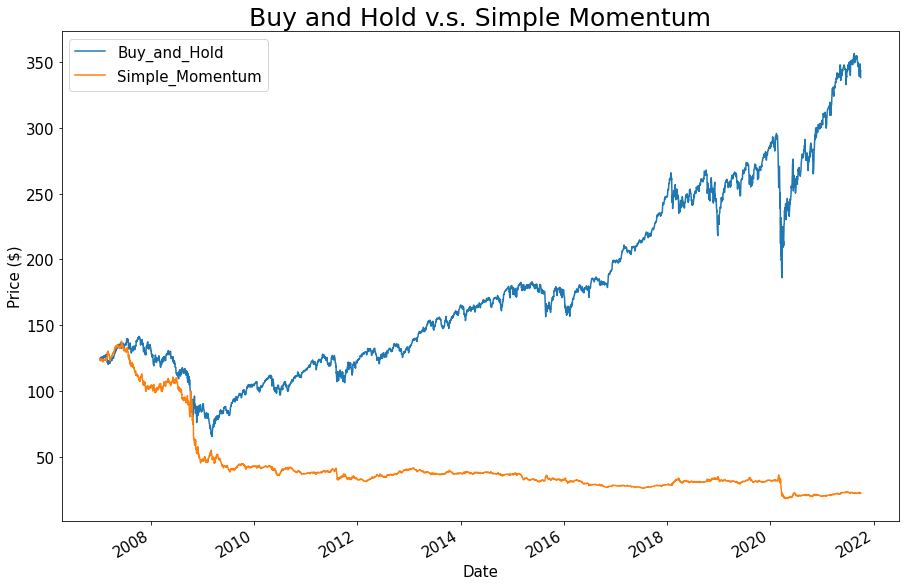

In [24]:
df2[["Buy_and_Hold", 
     "Simple_Momentum"]].plot(figsize = (15, 10), 
                              fontsize = 15)

plt.title("Buy and Hold v.s. Simple Momentum", 
          fontsize = 25)

plt.ylabel("Price ($)")
plt.legend(fontsize = 15)
plt.show()

<br></br>

We can also take a look at annual returns of each strategy. On average, buying and holding DIA generates a ~8.78% return every year while our momentum strategy with DIA generated a -9.78% return every year. Needless to say, simply buying and holding DIA here would be a better strategy.

In [25]:
# Aggregate the entire column and find the mean for columns
# DIA_Return and Momentum_Return_Perct
# Multiply by 252 because that's the average number of 
# trading days in a year according to Google. 

display(df[["DIA_Return", "Momentum_Return"]].agg(["mean"]) * 252)

,DIA_Return,Momentum_Return
mean,0.087378,-0.097409


----------------------------------------------------------

## Backtesting a Simple Moving Averages Crossover Strategy

### What Simple Moving Averages Are

<a href="https://www.investopedia.com/terms/s/sma.asp" target="_blank">What is a simple moving average</a>?

Similar to backtesting simple momentum from before, we will compare our simple moving averages (SMA) strategy to just passively buying and holding DIA. 

A simple moving average smooths out volatility and makes it easier to view the price trend of a security. If the simple moving average points up, this means that the security's price is increasing. If it is pointing down, it means that the security's price is decreasing. The longer the time frame for the moving average, the smoother the simple moving average. 



The formula for simple moving averages is:

$$ \Large SMA = \frac{A_{1} + A_{2} + A_{3} + ... + A_{n}}{n} $$

Where 
$A_{n}$ is the price of the asset at period $n$ and 

$n$ is the number of total periods.

For example, a 10-day moving average would average out the closing prices for the first 10 days as the first data point. The next data point would <b>drop the earliest price</b>, add the price on <b>day 11</b>, and then <b>take the average</b>, and so on.

First let's import our DIA historical data:

In [26]:
# parse_dates and set index_col to Date
SMA = pd.read_csv("dia_15year_prices.csv", parse_dates = ["Date"], index_col = "Date")

# Grabbing all rows, but just the Closing price column
SMA_df = SMA.loc[:, "Close"].to_frame()

# Finding the percent change/ return of DIA by timestamp
SMA_df['DIA_Return'] = SMA_df.Close.pct_change()

# Renaming "Close" (closing price) to be more specific
SMA_df.rename(columns = {"Close":"DIA_Close_Price"}, inplace = True)

# Dropping NaN (in this case just the first row because we don't
# have data from the previous day)
SMA_df.dropna(inplace = True)

SMA_df

,DIA_Close_Price,DIA_Return
Date,,
2007-01-04,124.680000,0.001687
2007-01-05,123.739998,-0.007539
2007-01-08,124.139999,0.003233
2007-01-09,124.070000,-0.000564
2007-01-10,124.430000,0.002902
...,...,...
2021-09-24,347.869995,0.000892
2021-09-27,348.609985,0.002127
2021-09-28,342.920013,-0.016322


<br></br>

For this project we will use a window of 50 consecutive days for our moving average. We can calculate the average and add it to a new column called "SMA_50" using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html" target="_blank">.rolling( ) method</a>

In [27]:
# For each and every timestamp we calculate the average (mean price) 
# for the immediately preceding 50 trading days

SMA_df['SMA_50'] = SMA_df.DIA_Close_Price.rolling(window = 50).mean()

# Including a day number column
days = []
for i in range(1,3713):
    days.append(i)
    
SMA_df.insert(0, 'Day', days)

SMA_df.head(55)

,Day,DIA_Close_Price,DIA_Return,SMA_50
Date,,,,
2007-01-04,1,124.680000,0.001687,NaN
2007-01-05,2,123.739998,-0.007539,NaN
2007-01-08,3,124.139999,0.003233,NaN
2007-01-09,4,124.070000,-0.000564,NaN
2007-01-10,5,124.430000,0.002902,NaN
2007-01-11,6,124.989998,0.004501,NaN
2007-01-12,7,125.660004,0.005360,NaN
2007-01-16,8,125.699997,0.000318,NaN
2007-01-17,9,125.750000,0.000398,NaN


<br></br>

You'll see above that we have NaN values for days 1-49, this is because our moving average takes the preceding <b>50 days of prices</b> to calculate the average. So the average immediately appears on day 50. On day 51, we use the preceding 2-50 days, and so on.

Now let's visualize the daily prices and the moving average in a quick graph:

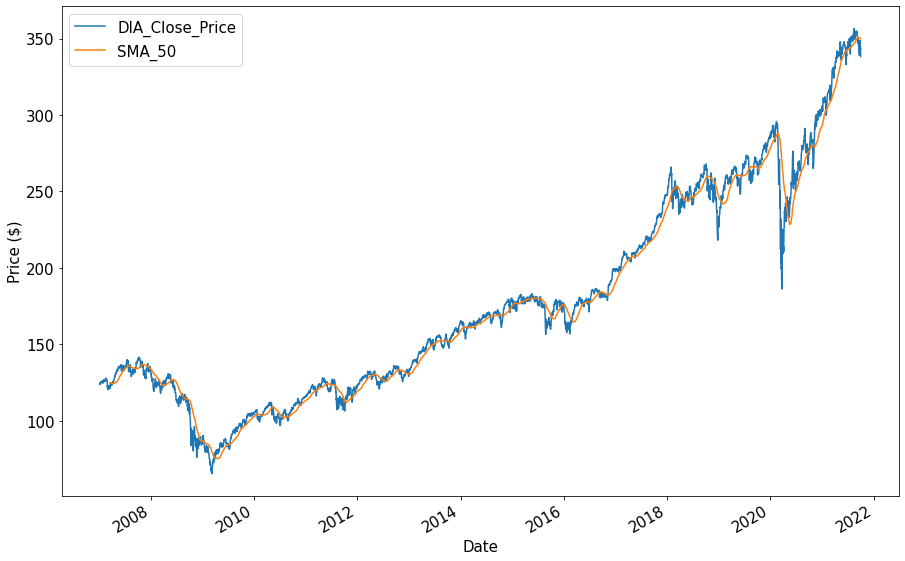

In [28]:
SMA_df[["DIA_Close_Price","SMA_50"]].plot(figsize = (15,10), fontsize = 15)
plt.ylabel("Price ($)", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

<br></br>

We see that our simple moving average of 50 days smooths the daily prices of DIA. Let's use another popular moving average window of 200 trading days and we'll also make a new column for this and visualize SMA_50 vs SMA_200:

In [29]:
SMA_df['SMA_200'] = SMA_df.DIA_Close_Price.rolling(window = 200).mean()
SMA_df

,Day,DIA_Close_Price,DIA_Return,SMA_50,SMA_200
Date,,,,,
2007-01-04,1,124.680000,0.001687,NaN,NaN
2007-01-05,2,123.739998,-0.007539,NaN,NaN
2007-01-08,3,124.139999,0.003233,NaN,NaN
2007-01-09,4,124.070000,-0.000564,NaN,NaN
2007-01-10,5,124.430000,0.002902,NaN,NaN
...,...,...,...,...,...
2021-09-24,3708,347.869995,0.000892,350.052600,332.876449
2021-09-27,3709,348.609985,0.002127,350.090000,333.115099
2021-09-28,3710,342.920013,-0.016322,350.150800,333.326999


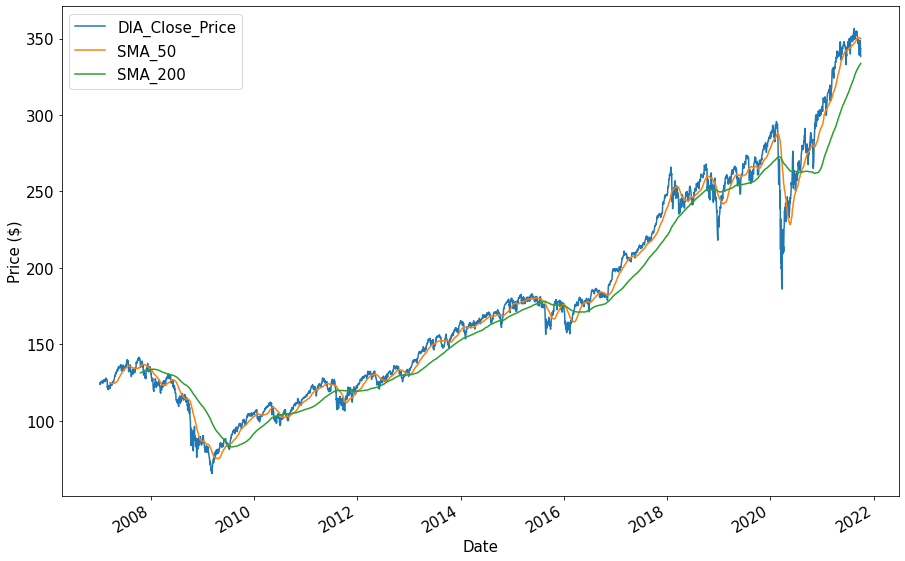

In [30]:
SMA_df[["DIA_Close_Price","SMA_50","SMA_200"]].plot(figsize = (15,10), fontsize = 15)
plt.ylabel("Price ($)", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

We see that our rolling window of 200 days smoothens out the prices even more. Additionally when comparing 200 preceding days v.s. 50 preceding days, we can say 50 days captures a more recent window (recent prices) and thus reacts <b>faster</b> to changing prices than the estimated 200.

This is shown in the graph above around the time of Covid-19 (early 2020 - Feb/ March), the SMA_50 prices falls faster than that of SMA_200 (because only the most recent 50 days are taken into account). 

Additionally, notice how the two curves happen to intersect at numerous points. These intersections are known as <a href="https://en.wikipedia.org/wiki/Moving_average_crossover#:~:text=A%20crossover%20occurs%20when%20a,a%20longer%20period%20moving%20average).&text=The%20particular%20case%20where%20simple,%2Daverage%20(SMA)%20crossover." target="_blank">crossovers</a>.

### Our Strategy

With that being said, now let's introduce our two strategies. Similar to backtesting our momentum strategy from before where we just buy/ sell reactively to day-to-day prices, we will again compare our simple moving averages strategy to just buying and holding.

1. <u><b>Buying and Holding</b> (Passive Strategy - Base Case):</u> 
    - Initially investing into DIA and do nothing (Position: +1 on any given day)
    
    
2. <u><b>SMA Crossovers</b> (Active Strategy - Test Case):</u> 
    - Long Position (+1): If SMA_50 > SMA_200
    - Short Position (-1): If SMA_50 < SMA_200
    
We argue here that the most recent price trends are likely to persist in the near future. So, whenever the shorter period moving average (SMA_50) crosses <b>above</b> the longer period moving average (SMA_200) - it is a sign to buy. Whenever the SMA_50 crosses <b>below</b> the SMA_200 - it is a sign to sell (or go short).

We'll first drop any NaN rows and start 200 days in (when we have our averages). Then, we will create a new "Position" column that determines if we should by (+1) or sell/ short (-1). 

In [31]:
# Dropping NaN values/ starting from day 200
SMA_df.dropna(inplace = True)

# Creating our Position Column
# The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0. 
# nan is returned for nan inputs
# in this case if difference between: SMA_50 and SMA_200 is:
# SMA_50 - SMA_200 < 0: returns -1
# SMA_50 - SMA_200 > 0: returns +1
# SMA_50 - SMA_200 = 0: returns 0
SMA_df["Position"] = np.sign(SMA_df.SMA_50.sub(SMA_df.SMA_200))

SMA_df

,Day,DIA_Close_Price,DIA_Return,SMA_50,SMA_200,Position
Date,,,,,,
2007-10-18,200,138.800003,-0.002587,135.514000,131.286200,1.0
2007-10-19,201,134.929993,-0.027882,135.556800,131.337450,1.0
2007-10-22,202,135.449997,0.003854,135.627000,131.396000,1.0
2007-10-23,203,136.419998,0.007161,135.711800,131.457400,1.0
2007-10-24,204,136.500000,0.000586,135.832000,131.519550,1.0
...,...,...,...,...,...,...
2021-09-24,3708,347.869995,0.000892,350.052600,332.876449,1.0
2021-09-27,3709,348.609985,0.002127,350.090000,333.115099,1.0
2021-09-28,3710,342.920013,-0.016322,350.150800,333.326999,1.0


<br></br>

Next, let's determine our daily returns using our SMA crossover strategy where we get a percent change value that's either positive or negative depending on if we made a profit/ loss that day (should reflect the <b>changes</b> in DIA closing prices - so the "DIA Return" column): 

( positive = profit | negative = loss )

In [32]:
# Multiplying DIA Return with where our Position stands
# We shift the values down 1 row because the first day starting out
# we will always buy first. 
SMA_df["SMA_Crossover_Return"] = SMA_df["Position"].shift() * SMA_df["DIA_Return"]
SMA_df

,Day,DIA_Close_Price,DIA_Return,SMA_50,SMA_200,Position,SMA_Crossover_Return
Date,,,,,,,
2007-10-18,200,138.800003,-0.002587,135.514000,131.286200,1.0,NaN
2007-10-19,201,134.929993,-0.027882,135.556800,131.337450,1.0,-0.027882
2007-10-22,202,135.449997,0.003854,135.627000,131.396000,1.0,0.003854
2007-10-23,203,136.419998,0.007161,135.711800,131.457400,1.0,0.007161
2007-10-24,204,136.500000,0.000586,135.832000,131.519550,1.0,0.000586
...,...,...,...,...,...,...,...
2021-09-24,3708,347.869995,0.000892,350.052600,332.876449,1.0,0.000892
2021-09-27,3709,348.609985,0.002127,350.090000,333.115099,1.0,0.002127
2021-09-28,3710,342.920013,-0.016322,350.150800,333.326999,1.0,-0.016322


<br></br>

Now that we have our daily returns percentage for our SMA crossover strategy, let's convert this to reflect the actual prices of DIA for each timestamp - similar to what we did in our simple momentum backtest from before:

In [33]:
SMA_df["SMA_Crossover_Price"] = SMA_df.SMA_Crossover_Return.add(1,
                                fill_value = 0).cumprod() * SMA_df.iloc[0,1]

SMA_df

,Day,DIA_Close_Price,DIA_Return,SMA_50,SMA_200,Position,SMA_Crossover_Return,SMA_Crossover_Price
Date,,,,,,,,
2007-10-18,200,138.800003,-0.002587,135.514000,131.286200,1.0,NaN,138.800003
2007-10-19,201,134.929993,-0.027882,135.556800,131.337450,1.0,-0.027882,134.929993
2007-10-22,202,135.449997,0.003854,135.627000,131.396000,1.0,0.003854,135.449997
2007-10-23,203,136.419998,0.007161,135.711800,131.457400,1.0,0.007161,136.419998
2007-10-24,204,136.500000,0.000586,135.832000,131.519550,1.0,0.000586,136.500000
...,...,...,...,...,...,...,...,...
2021-09-24,3708,347.869995,0.000892,350.052600,332.876449,1.0,0.000892,128.134683
2021-09-27,3709,348.609985,0.002127,350.090000,333.115099,1.0,0.002127,128.407251
2021-09-28,3710,342.920013,-0.016322,350.150800,333.326999,1.0,-0.016322,126.311403


<br></br>

Let's visualize the two strategies (buy and hold vs SMA crossover) on a graph:

In [34]:
SMA_df2 = SMA_df.copy()
SMA_df2.rename(columns = {"DIA_Close_Price":"Buy_and_Hold",
                      "SMA_Crossover_Price":"SMA_Crossover"}, 
                       inplace = True)

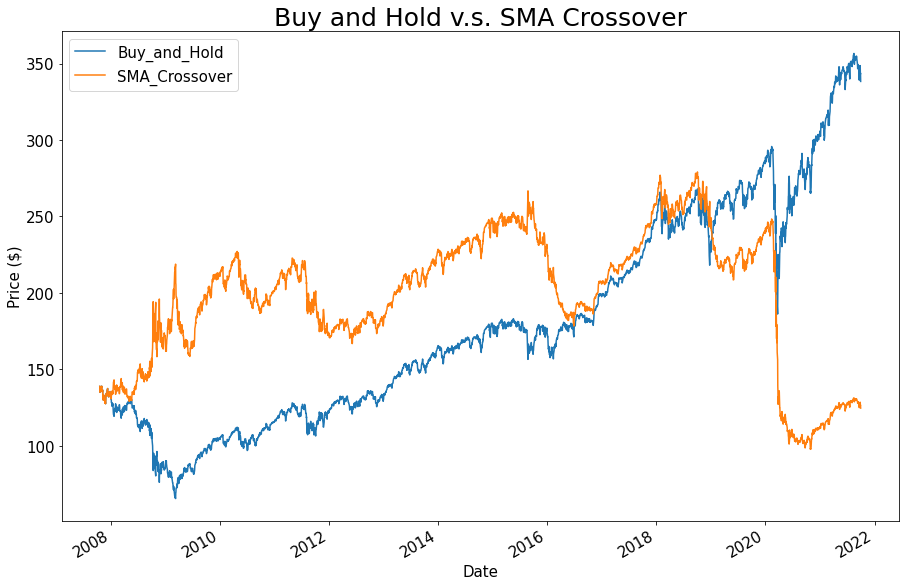

In [35]:
SMA_df2[["Buy_and_Hold", 
         "SMA_Crossover"]].plot(figsize = (15, 10), 
                                fontsize = 15)

plt.title("Buy and Hold v.s. SMA Crossover", 
          fontsize = 25)

plt.ylabel("Price ($)")
plt.legend(fontsize = 15)
plt.show()

<br></br>

We can also take a look at annual returns of each strategy. On average, buying and holding DIA generates a 8.42% return every year while our SMA crossover strategy with DIA generated a 1.27% return every year. Again, buying and holding DIA here would be a better strategy.

In [36]:
# Aggregate the entire column and find the mean for columns
# DIA_Return and SMA_Crossover_Return
# Multiply by 252 because that's the average number of 
# trading days in a year according to Google. 

SMA_df[["DIA_Return", "SMA_Crossover_Return"]].agg(["mean"]) * 252

,DIA_Return,SMA_Crossover_Return
mean,0.083876,0.012683


------------------------------------

## Conclusion

I learned at the end of this project that simply buying and holding DIA would have yielded me a \~8.4% return every year.

Although the simple moving averages strategy did seem to beat DIA for a while, it did not last. Because of the sharp dip due to covid we see that we would have lost an insane amount of money. 

Compared to the <a href="#Backtesting-a-Simple-Momentum-Strategy">simple momentum strategy</a>, SMA did perform better, but one major disadvantage of SMA is that <b>it is slower to respond to rapid price changes</b>. Moving forward, if we want a faster response to the market data - perhaps we can use <a href="https://www.investopedia.com/terms/e/ema.asp" target="_blank">exponential moving averages</a>.

In the meantime it's probably best for me to stick to a more passive strategy: buying and hold DIA. 

### Edits & Moving Forward

After discussing this project with a friend in finance, he gave me some pointers on how to improve future projects like this one. 

   - Using <a href="https://www.investopedia.com/terms/a/adjusted_closing_price.asp" target="_blank">adjusted close price</a> instead of just the regular close price. 
       - <u><b>Tldr</b></u>: the adj. close price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions (e.g. stock's dividends, stock splits, and new stock offerings). Luckily, <a href="https://www.splithistory.com/dia/" target="_blank">DIA did not split, ever</a>.
   
   
   - Using <a href="https://www.linkedin.com/pulse/cagr-aagr-mohammad-pazoukimehr/" target="_blank">CAGR rather than AAGR</a> when calculating annual growth rates.
       - <a href="https://www.pocketrisk.com/wp-content/uploads/2018/11/Pocket-Risk-Client-Guide-CAGR.pdf" target="_blank">Why use CAGR over simple annual returns</a> 
           - <u><b>Tldr</b></u>: CAGR (compound annual growth rate) captures the effects of compounding whereas AAGR (Average Annual Growth Rate) does.

<br></br>

<center>Click here to <a href="#Backtesting-Investment-Strategies">return to the top</a>.</center>